![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
from datetime import datetime

In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42
CURRENT_DATE = pd.to_datetime('10/07/2020')
CURRENT_DATE

Timestamp('2020-10-07 00:00:00')

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [5]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [9]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [10]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [14]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
6466,id_6466,London,NaN,9104.0,NaN,2.0,"[['AMAZING! THE OWNER IS A GENIUS!', 'A perfec...",/Restaurant_Review-g186338-d8810148-Reviews-Oa...,d8810148,0,0.0
49689,id_8243,Madrid,['Barbecue'],8250.0,$$ - $$$,22.0,[['The worst service in Madrid / El peor serv....,/Restaurant_Review-g187514-d2061415-Reviews-El...,d2061415,1,3.0
35050,id_3980,Madrid,NaN,3982.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187514-d10547346-Reviews-D...,d10547346,1,5.0
32963,id_1486,Berlin,"['German', 'Austrian', 'European', 'Central Eu...",1488.0,$$ - $$$,71.0,"[['Very nice traditional Tiroler restaurant', ...",/Restaurant_Review-g187323-d1036940-Reviews-Ti...,d1036940,1,4.0
9508,id_9508,Rome,NaN,5728.0,NaN,2.0,"[['Amazing baked goods'], ['01/11/2013']]",/Restaurant_Review-g187791-d3751368-Reviews-Pa...,d3751368,0,0.0


In [15]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [16]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [17]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [18]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
# data['Number of Reviews'].fillna(0, inplace=True)

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [19]:
# изучаем структуру и тип данных
print(data['Cuisine Style'][0], type(data['Cuisine Style'][0]))
print(data['Cuisine Style'][28139], type(data['Cuisine Style'][28139]))
print(data['Cuisine Style'][28482], type(data['Cuisine Style'][28482]))

['Bar', 'Pub'] <class 'str'>
['German'] <class 'str'>
nan <class 'float'>


In [20]:
data['Cuisine_Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [21]:
# данные имеют структуру списков, но тип - строки
# создаем функцию для превращения данных в списки + заменяем NAN
def cuisine_into_list(cell):
    if pd.isnull(cell) == False:
        cell = cell[2:-2].split("', '")
    else:
        cell = ['Other']
    return cell

In [22]:
data['Cuisine Style'] = data['Cuisine Style'].apply(cuisine_into_list)

In [23]:
# смотрим, что получилось
print(data['Cuisine Style'][0], type(data['Cuisine Style'][0]))
print(data['Cuisine Style'][28139], type(data['Cuisine Style'][28139]))
print(data['Cuisine Style'][28482], type(data['Cuisine Style'][28482]))

['Bar', 'Pub'] <class 'list'>
['German'] <class 'list'>
['Other'] <class 'list'>


In [24]:
# подсчитываем количество Cuisine Style
data['Style_count'] = data['Cuisine Style'].apply(lambda x: len(x))

In [25]:
# изучаем структуру и тип данных
print(data['Reviews'][0], type(data['Reviews'][0]))
print(data['Reviews'][1], type(data['Reviews'][1]))

[[], []] <class 'str'>
[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']] <class 'str'>


In [26]:
# данные имеют структуру списка со вложенными списками, но тип - строки
# создаем функцию для замены пустых списков на NAN
def turn_to_none(cell):
    if cell == '[[], []]' or cell == '[]':
        cell = None
    return cell

In [27]:
data['Reviews'] = data['Reviews'].apply(turn_to_none)

In [28]:
data['Reviews&date_isNAN'] = pd.isna(data['Reviews']).astype('uint8')

In [29]:
# превращаем данные в списки
data['Reviews'] = data['Reviews'].dropna().apply(lambda x: x[2:-2].split("], ["))

In [30]:
# отделяем даты от ревью и превращаем данные в списки
data['Reviews date'] = data['Reviews'].dropna().apply(lambda x: x[1][1:-1].split("', '"))

In [31]:
# превращаем данные в даты
data['Reviews date'] = data['Reviews date'].dropna().apply(lambda x: [pd.to_datetime(i) for i in x])

In [32]:
# отделяем ревью и превращаем данные в списки
data['Reviews'] = data['Reviews'].dropna().apply(lambda x: x[0][1:-1].split("', '"))

In [33]:
# подсчитываем количество (0, 1 или 2) ревью для замены NAN в Number of Reviews
data['Reviews_count'] = data['Reviews'].dropna().apply(lambda x: len(x))
data['Reviews_count'] = data['Reviews_count'].fillna(0)

In [34]:
# и производим замену на минимальное количество отзывов
data['Number of Reviews New'] = data['Number of Reviews']
data['Number of Reviews New'] = data['Number of Reviews New'].fillna(data['Reviews_count'])

In [35]:
# производим замену на среднее количество отзывов по городу
NoR_City = data.dropna().groupby(['City'])['Number of Reviews'].mean()
data['mean_NoR_City'] = data['City'].apply(lambda x: NoR_City[x])
data['Number of Reviews City'] = data['Number of Reviews']
data['Number of Reviews City'] = data['Number of Reviews City'].fillna(round(data['mean_NoR_City'], 0))

In [36]:
# производим замену на среднее количество отзывов по ресторану
NoR_Rest_id = data.groupby(['Restaurant_id'])['Number of Reviews'].mean()
data['mean_NoR_Rest_id'] = data['Restaurant_id'].apply(lambda x: NoR_Rest_id[x])
data['Number of Reviews Rest_id'] = data['Number of Reviews']
data['Number of Reviews Rest_id'] = data['Number of Reviews Rest_id'].fillna(round(data['mean_NoR_Rest_id'], 0))
# дополним средними данными по городу
data['Number of Reviews Rest_id'] = data['Number of Reviews Rest_id'].fillna(round(data['mean_NoR_City'], 0))

In [37]:
# подсчитываем количество дней между ревью
def len_count(cell):
    if len(cell) == 2:
        cell = np.max(cell) - np.min(cell)
    else:
        cell = 0
    return int(str(cell).split(' days ')[0])
data['Reviews period'] = data['Reviews date'].dropna().apply(len_count)

In [38]:
# подсчитываем количество дней с даты последнего ревью
data['Last Reviews'] = data['Reviews date'].dropna().apply(lambda x: int(str((CURRENT_DATE-np.max(x))).split(' days ')[0]))

In [39]:
# заменяем NAN
data['Reviews period'] = data['Reviews period'].fillna(-1)
data['Last Reviews'] = data['Last Reviews'].fillna(-1)

In [40]:
data.describe()

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Cuisine_Style_isNAN,Style_count,Reviews&date_isNAN,Reviews_count,Number of Reviews New,mean_NoR_City,Number of Reviews City,mean_NoR_Rest_id,Number of Reviews Rest_id,Reviews period,Last Reviews
count,50000.000000,46800.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49631.000000,50000.000000,50000.000000,50000.000000
mean,3664.427520,124.471197,0.800000,3.194430,0.064000,0.231800,2.625320,0.162280,1.533460,116.528560,178.513221,127.147940,122.705313,123.071200,103.060180,1041.999400
std,3700.092452,294.114345,0.400004,1.705453,0.244755,0.421986,1.824029,0.368711,0.757266,286.163568,64.774696,285.081785,153.458285,285.976857,199.896964,566.812582
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,83.606138,2.000000,2.000000,2.000000,-1.000000,-1.000000
25%,972.000000,9.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.000000,132.592742,10.000000,34.571429,10.000000,0.000000,1008.000000
50%,2278.000000,33.000000,1.000000,4.000000,0.000000,0.000000,2.000000,0.000000,2.000000,28.000000,179.209838,38.000000,74.200000,35.000000,29.000000,1074.000000
75%,5241.000000,115.000000,1.000000,4.500000,0.000000,0.000000,4.000000,0.000000,2.000000,105.000000,185.468416,135.000000,145.888889,118.000000,120.000000,1238.000000
max,16444.000000,9660.000000,1.000000,5.000000,1.000000,1.000000,21.000000,1.000000,2.000000,9660.000000,377.792432,9660.000000,3538.000000,9660.000000,3296.000000,6013.000000


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
Restaurant_id                50000 non-null object
City                         50000 non-null object
Cuisine Style                50000 non-null object
Ranking                      50000 non-null float64
Price Range                  32639 non-null object
Number of Reviews            46800 non-null float64
Reviews                      41886 non-null object
URL_TA                       50000 non-null object
ID_TA                        50000 non-null object
sample                       50000 non-null int64
Rating                       50000 non-null float64
Number_of_Reviews_isNAN      50000 non-null uint8
Cuisine_Style_isNAN          50000 non-null uint8
Style_count                  50000 non-null int64
Reviews&date_isNAN           50000 non-null uint8
Reviews date                 41886 non-null object
Reviews_count                50000 non-null float64
Number of Reviews New    

In [42]:
data = data.drop(['mean_NoR_City', 'mean_NoR_Rest_id'], axis = 1)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [43]:
# data.nunique(dropna=False)

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

#### Возьмем следующий признак "Price Range".

In [44]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [45]:
# Ваша обработка 'Price Range'

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

In [46]:
# посмотрим есть ли корреляция данного признака с другими
# сначала присвоим код каждему городу и Price Range
city_code = {}
counter = 0
for city in data['City'].unique():
    counter += 1
    city_code.setdefault(city, counter)
data['City Code'] = data['City'].apply(lambda x: city_code[x])

In [47]:
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
data['Price Range New'] = data['Price Range']
data = data.replace({"Price Range New": price_dict})
data['Price Range New'].value_counts()

2.0    23041
1.0     7816
3.0     1782
Name: Price Range New, dtype: int64

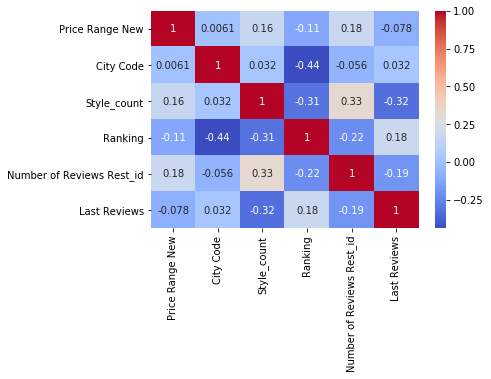

In [48]:
corr = data.dropna()[['Price Range New', 'City Code', 'Style_count', 'Ranking', 
                       'Number of Reviews Rest_id', 'Last Reviews']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [49]:
# Price Range имеет прямую корреляцию с количеством представленных в ресторане кухонь и количеством ревью
# производим замену на среднее по этим параметрам
PrR = data.groupby(['Style_count', 'Number of Reviews Rest_id'])['Price Range New'].mean()
data['Sc_NRR'] = data['Style_count']&data['Number of Reviews Rest_id']
data['PrR'] = data['Sc_NRR'].apply(lambda x: PrR[x])
data['Price Range New'] = data['Price Range New'].fillna(round(data['PrR'], 0))
data['Price Range New'].value_counts()

2.0    40402
1.0     7816
3.0     1782
Name: Price Range New, dtype: int64

In [50]:
data = data.drop(['Sc_NRR', 'PrR'], axis = 1)

In [51]:
# можно было и просто на моду заменить...
data['Price Range'] = data['Price Range'].fillna('$$ - $$$')
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [52]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data['City Name'] = data['City']
data = pd.get_dummies(data, columns=[ 'City Name',], dummy_na=True)

In [53]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,City Name_Oporto,City Name_Oslo,City Name_Paris,City Name_Prague,City Name_Rome,City Name_Stockholm,City Name_Vienna,City Name_Warsaw,City Name_Zurich,City Name_nan
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,NaN,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[Very good reviews!, Fine dining in Hakaniemi]",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[Better than the Links, Ivy Black]",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[Most exquisite, Delicious and authentic]",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[Always the best in bratislava, Very good but ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,City Name_Oporto,City Name_Oslo,City Name_Paris,City Name_Prague,City Name_Rome,City Name_Stockholm,City Name_Vienna,City Name_Warsaw,City Name_Zurich,City Name_nan
39961,id_382,Amsterdam,"[Seafood, Chinese, Asian, Vegetarian Friendly,...",383.0,$$ - $$$,845.0,"[Excellent location, Authentic cantonese cuisine]",/Restaurant_Review-g188590-d1076655-Reviews-Or...,d1076655,1,...,0,0,0,0,0,0,0,0,0,0
31658,id_463,Luxembourg,[Vegetarian Friendly],464.0,$$ - $$$,25.0,"[Fine food in chique surrounding, Delicious fo...",/Restaurant_Review-g190356-d10067005-Reviews-C...,d10067005,1,...,0,0,0,0,0,0,0,0,0,0
16464,id_297,Prague,[Bar],298.0,$$ - $$$,130.0,"[Great - and slightly quirky - cocktail bar, P...",/Restaurant_Review-g274707-d6638537-Reviews-Or...,d6638537,1,...,0,0,0,1,0,0,0,0,0,0
39194,id_366,Lyon,[Seafood],367.0,$$ - $$$,274.0,"[Excellent food, sluggish service, A Very Plea...",/Restaurant_Review-g187265-d850298-Reviews-Le_...,d850298,1,...,0,0,0,0,0,0,0,0,0,0
9776,id_9776,Warsaw,"[Seafood, Mediterranean, Wine Bar]",548.0,$$ - $$$,8.0,"[Oasis, Warsaw]",/Restaurant_Review-g274856-d12351757-Reviews-L...,d12351757,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
data = pd.get_dummies(data, columns=[ 'Price Range',], dummy_na=True)
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City Name_Rome,City Name_Stockholm,City Name_Vienna,City Name_Warsaw,City Name_Zurich,City Name_nan,Price Range_$,Price Range_$$ - $$$,Price Range_$$$$,Price Range_nan
39161,id_13562,Paris,[Other],13564.0,13.0,"[Reasonable spot for coffee, Enjoyed our drink!]",/Restaurant_Review-g187147-d5811563-Reviews-Ta...,d5811563,1,2.5,...,0,0,0,0,0,0,0,1,0,0
38821,id_1757,Lyon,[Other],1758.0,2.0,NaN,/Restaurant_Review-g1166685-d11576172-Reviews-...,d11576172,1,4.5,...,0,0,0,0,0,0,0,1,0,0
9507,id_9507,Madrid,[Other],5988.0,NaN,NaN,/Restaurant_Review-g187514-d7252240-Reviews-Ca...,d7252240,0,0.0,...,0,0,0,0,0,0,0,1,0,0
25103,id_4292,Rome,"[Italian, Mediterranean, Vegetarian Friendly]",4293.0,557.0,"[Fabulous little Restaurant and wine Bar', ""Su...",/Restaurant_Review-g187791-d1901409-Reviews-Ri...,d1901409,1,3.5,...,1,0,0,0,0,0,0,1,0,0
9374,id_9374,Copenhagen,"[European, Grill, Danish, American, Bar]",36.0,696.0,"[Yummy, Crazy good]",/Restaurant_Review-g189541-d1393513-Reviews-Sp...,d1393513,0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
style_list = []
for cuisine in data['Cuisine Style']:
    for style in cuisine:
        if not(style in style_list):
            style_list.append(style)
print(len(style_list))

126


In [57]:
def find_item(cell):
    if item in cell:
        return 1
    return 0

In [58]:
for item in style_list:
    data[item] = data['Cuisine Style'].apply(find_item)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 185 entries, Restaurant_id to Latvian
dtypes: float64(10), int64(129), object(7), uint8(39)
memory usage: 57.6+ MB


In [60]:
print(np.min(data['City Name_nan']))
print(np.max(data['City Name_nan']))
print(np.min(data['Price Range_nan']))
print(np.max(data['Price Range_nan']))

0
0
0
0


In [61]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian
5692,id_5692,Oslo,"[Sushi, Asian, Korean]",681.0,9.0,"[Great food, stiff prices, Quite decent! in Os...",/Restaurant_Review-g190479-d3832734-Reviews-Ti...,d3832734,0,0.0,...,0,0,0,0,0,0,0,0,0,0
45673,id_11186,Paris,"[French, Bar, European]",11188.0,312.0,"[Forgettable, Nice location, interesting decor...",/Restaurant_Review-g187147-d816881-Reviews-Le_...,d816881,1,3.0,...,0,0,0,0,0,0,0,0,0,0
41867,id_8104,London,"[Indian, Asian, Balti, Eastern European, Bangl...",8113.0,26.0,"[Good old fashioned Indian food, One of the to...",/Restaurant_Review-g186338-d2011044-Reviews-Bo...,d2011044,1,4.0,...,0,0,0,0,0,0,0,0,0,0
32771,id_1981,Lisbon,"[European, Portuguese]",1984.0,19.0,NaN,/Restaurant_Review-g189158-d6001477-Reviews-Re...,d6001477,1,4.5,...,0,0,0,0,0,0,0,0,0,0
4349,id_4349,Madrid,[Other],6540.0,10.0,NaN,/Restaurant_Review-g187514-d5489560-Reviews-Mc...,d5489560,0,0.0,...,0,0,0,0,0,0,0,0,0,0


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

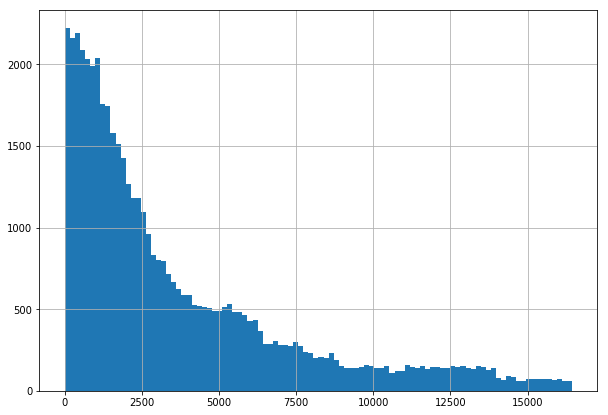

In [62]:
plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

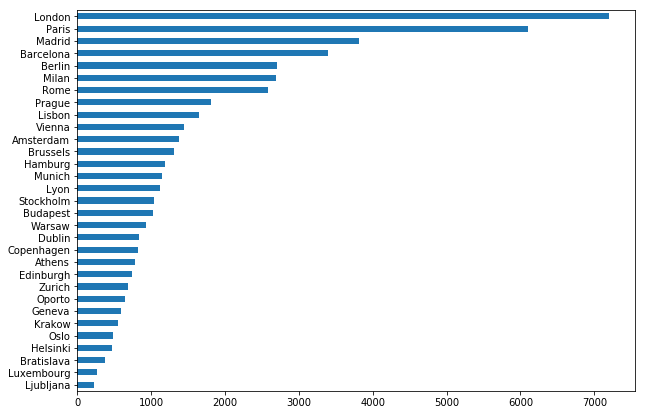

In [63]:
data['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

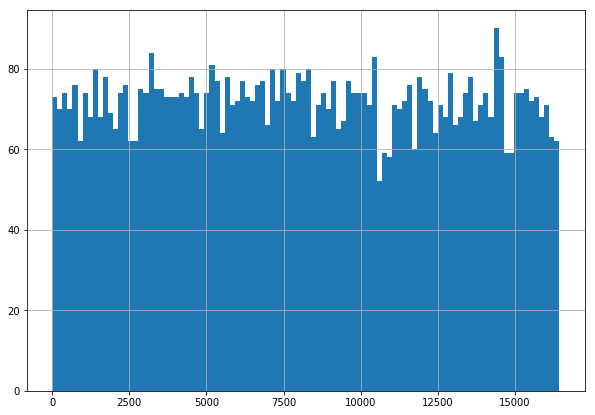

In [64]:
data['Ranking'][data['City'] =='London'].hist(bins=100)

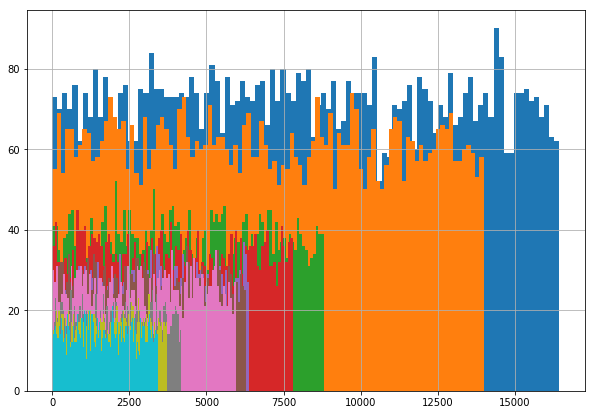

In [65]:
# посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


In [66]:
from sklearn.preprocessing import MinMaxScaler
ranking_scaler = MinMaxScaler()
# не получилось применить нормализацию - не поняла как это сделать в рамках отдельного города - сделала руками

In [67]:
city_list = []
for city in data['City']:
    if not(city in city_list):
        city_list.append(city)
print(len(city_list))

31


In [68]:
city_x_min = {}
city_x_max = {}
x_min = 0
x_max = 0
for city in city_list:
    x_min = np.min(data['Ranking'][data['City'] == city])
    x_max = np.max(data['Ranking'][data['City'] == city])
    city_x_min.setdefault(city, x_min)
    city_x_max.setdefault(city, x_max)

data['city_x_min'] = data['City'].apply(lambda x: city_x_min[x])
data['city_x_max'] = data['City'].apply(lambda x: city_x_max[x])

data['Ranking_new'] = round((data['Ranking'] - data['city_x_min'])/(data['city_x_max'] - data['city_x_min']), 5)

data = data.drop(['city_x_min', 'city_x_max'], axis = 1)

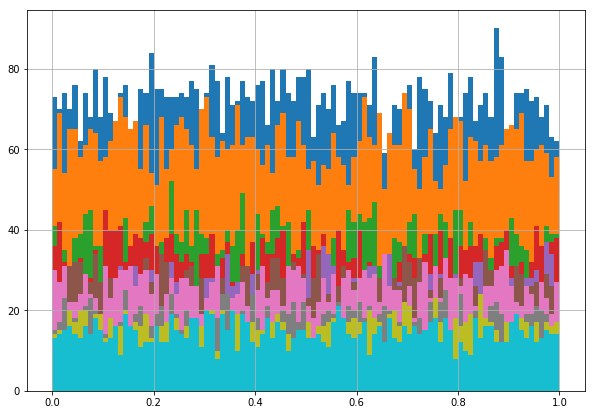

In [69]:
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking_new'][data['City'] == x].hist(bins=100)
plt.show()

### Посмотрим распределение целевой переменной

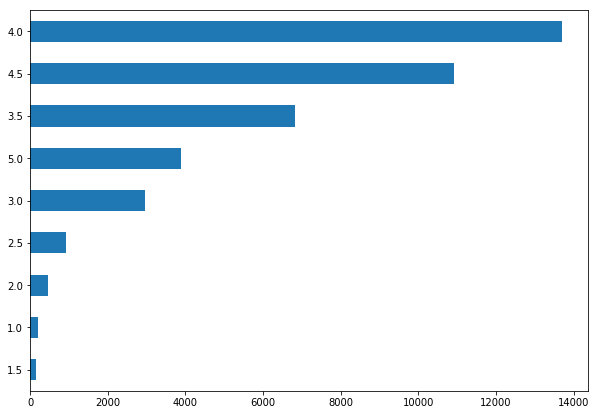

In [70]:
data_train = data[data['sample'] == 1]
data_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

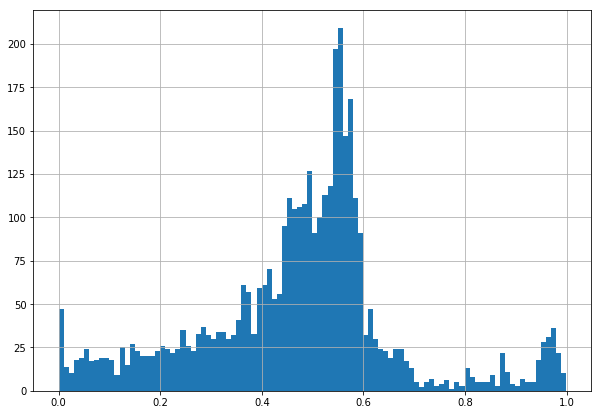

In [71]:
data_train['Ranking_new'][data['Rating'] == 5].hist(bins=100)

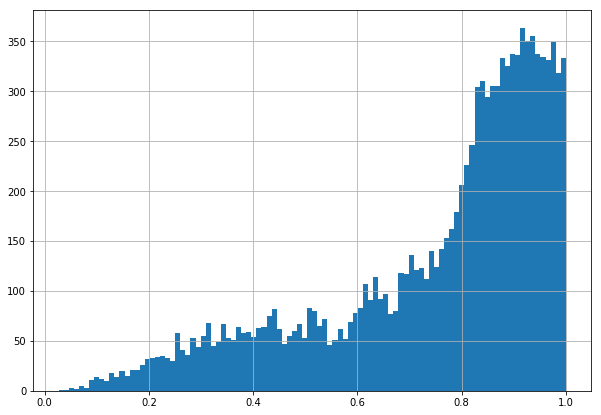

In [72]:
data_train['Ranking_new'][data_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

In [73]:
# посчитаем сколько ресторанов в каждом городе
Rest_in_City = data.dropna().groupby(['City'])['Restaurant_id'].count()
data['Rest_in_City'] = data['City'].apply(lambda x: Rest_in_City[x])

In [74]:
plt.rcParams['figure.figsize'] = (15,10)
corr = data_train[['Rating', 'Ranking_new', 'Ranking', 'Price Range New','City Code', 'Rest_in_City', 'Style_count',
                   'Number of Reviews New', 'Number of Reviews City',
                   'Number of Reviews Rest_id', 'Reviews period', 'Last Reviews', 'Reviews_count']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

KeyError: "['Rest_in_City'] not in index"

In [75]:
column_code = {}
counter = 0
for column in data.columns:
    counter += 1
    column_code.setdefault(counter, column)
column_code

{1: 'Restaurant_id',
 2: 'City',
 3: 'Cuisine Style',
 4: 'Ranking',
 5: 'Number of Reviews',
 6: 'Reviews',
 7: 'URL_TA',
 8: 'ID_TA',
 9: 'sample',
 10: 'Rating',
 11: 'Number_of_Reviews_isNAN',
 12: 'Cuisine_Style_isNAN',
 13: 'Style_count',
 14: 'Reviews&date_isNAN',
 15: 'Reviews date',
 16: 'Reviews_count',
 17: 'Number of Reviews New',
 18: 'Number of Reviews City',
 19: 'Number of Reviews Rest_id',
 20: 'Reviews period',
 21: 'Last Reviews',
 22: 'City Code',
 23: 'Price Range New',
 24: 'City Name_Amsterdam',
 25: 'City Name_Athens',
 26: 'City Name_Barcelona',
 27: 'City Name_Berlin',
 28: 'City Name_Bratislava',
 29: 'City Name_Brussels',
 30: 'City Name_Budapest',
 31: 'City Name_Copenhagen',
 32: 'City Name_Dublin',
 33: 'City Name_Edinburgh',
 34: 'City Name_Geneva',
 35: 'City Name_Hamburg',
 36: 'City Name_Helsinki',
 37: 'City Name_Krakow',
 38: 'City Name_Lisbon',
 39: 'City Name_Ljubljana',
 40: 'City Name_London',
 41: 'City Name_Luxembourg',
 42: 'City Name_Lyon',


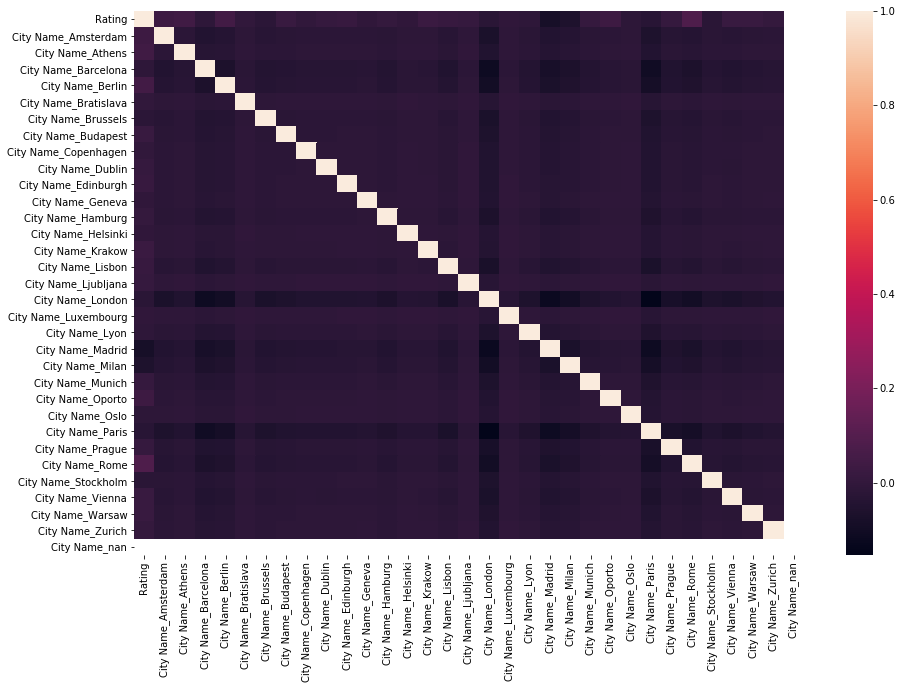

In [76]:
sns.heatmap(data_train[data_train.columns[9:55]].drop(['Number_of_Reviews_isNAN',
                                                       'Cuisine_Style_isNAN',
                                                       'Style_count',
                                                       'Reviews&date_isNAN',
                                                       'Reviews date',
                                                       'Reviews_count',
                                                       'Number of Reviews New',
                                                       'Number of Reviews City',
                                                       'Number of Reviews Rest_id',
                                                       'Reviews period',
                                                       'Last Reviews',
                                                       'City Code',
                                                       'Price Range New'], axis = 1).corr(),)

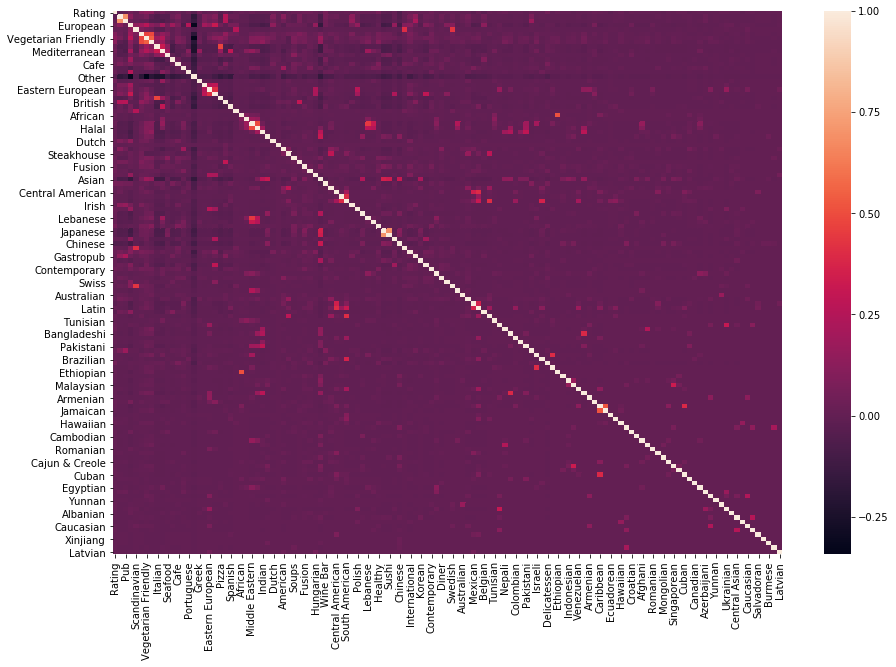

In [77]:
data_train_2 = data_train[data_train.columns[9:185]].drop(data_train.columns[10:59], axis = 1)
sns.heatmap(data_train_2.corr(),)

Две ощутимые корреляции рейтинга:
- с нормализованным ранкингом - обратнопропорциональная
- с количеством стилей кухонь - прямопропорциональная

При этом линейной зависимости не наблюдается

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [78]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [79]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    # df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    df_output['Cuisine Style'] = df_output['Cuisine Style'].dropna().apply(lambda x: x[2:-2].split("', '"))
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna('1')
    # подсчитываем количество Cuisine Style
    df_output['Style_count'] = df_output['Cuisine Style'].apply(lambda x: len(x))
    
    # посчитаем сколько ресторанов в каждом городе
    Rest_in_City = df_output.dropna().groupby(['City'])['Restaurant_id'].count()
    df_output['Rest_in_City'] = df_output['City'].apply(lambda x: Rest_in_City[x])
    
    # посчитаем сколько разных кухонь предпочитают рестораны в каждом городе
    Style_in_City = df_output.dropna().groupby(['City'])['Style_count'].count()
    df_output['Style_in_City'] = df_output['City'].apply(lambda x: Style_in_City[x])
    
    # данные имеют структуру списка со вложенными списками, но тип - строки
    # создаем функцию для замены пустых списков на NAN
    def turn_to_none(cell):
        if cell == '[[], []]' or cell == '[]':
            cell = None
        return cell
    df_output['Reviews'] = df_output['Reviews'].apply(turn_to_none)
    # превращаем данные в списки
    df_output['Reviews'] = df_output['Reviews'].dropna().apply(lambda x: x[2:-2].split("], ["))
    # отделяем даты от ревью и превращаем данные в списки
    df_output['Reviews date'] = df_output['Reviews'].dropna().apply(lambda x: x[1][1:-1].split("', '"))
    # превращаем данные в даты
    df_output['Reviews date'] = df_output['Reviews date'].dropna().apply(lambda x: [pd.to_datetime(i) for i in x])
    # отделяем ревью и превращаем данные в списки
    df_output['Reviews'] = df_output['Reviews'].dropna().apply(lambda x: x[0][1:-1].split("', '"))
    
    # производим замену на среднее количество отзывов по городу (лучшая корреляция из всех)
    NoR_City = df_output.dropna().groupby(['City'])['Number of Reviews'].mean()
    df_output['mean_NoR_City'] = df_output['City'].apply(lambda x: NoR_City[x])
    df_output['Number of Reviews City'] = df_output['Number of Reviews']
    df_output['Number of Reviews City'] = df_output['Number of Reviews City'].fillna(round(df_output['mean_NoR_City'], 0))
    
    # производим замену на среднее количество отзывов по ресторану
    NoR_Rest_id = df_output.groupby(['Restaurant_id'])['Number of Reviews'].mean()
    df_output['mean_NoR_Rest_id'] = df_output['Restaurant_id'].apply(lambda x: NoR_Rest_id[x])
    df_output['Number of Reviews Rest_id'] = df_output['Number of Reviews']
    df_output['Number of Reviews Rest_id'] = df_output['Number of Reviews Rest_id'].fillna(round(df_output['mean_NoR_Rest_id'], 0))
    # дополним средними данными по городу
    df_output['Number of Reviews Rest_id'] = df_output['Number of Reviews Rest_id'].fillna(round(df_output['mean_NoR_City'], 0))
    
    df_output = df_output.drop(['mean_NoR_City', 'mean_NoR_Rest_id'], axis = 1)
    
    # подсчитываем количество дней между ревью
    def len_count(cell):
        if len(cell) == 2:
            cell = np.max(cell) - np.min(cell)
        else:
            cell = 0
        return int(str(cell).split(' days ')[0])
    df_output['Reviews period'] = df_output['Reviews date'].dropna().apply(len_count)
    # подсчитываем количество дней с даты последнего ревью
    df_output['Last Reviews'] = df_output['Reviews date'].dropna().apply(lambda x: int(str((CURRENT_DATE-np.max(x))).split(' days ')[0]))
    # заменяем NAN
    df_output['Reviews period'] = df_output['Reviews period'].fillna(-1)
    df_output['Last Reviews'] = df_output['Last Reviews'].fillna(-1)
    
    # Ваша обработка 'Price Range'
    price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
    df_output['Price Range New'] = df_output['Price Range']
    df_output = df_output.replace({"Price Range New": price_dict})
    # Price Range имеет прямую корреляцию с количеством представленных в ресторане кухонь и количеством ревью
    # производим замену на среднее по этим параметрам
    PrR = df_output.groupby(['Style_count', 'Number of Reviews Rest_id'])['Price Range New'].mean()
    df_output['Sc_NRR'] = df_output['Style_count']&df_output['Number of Reviews Rest_id']
    df_output['PrR'] = df_output['Sc_NRR'].apply(lambda x: PrR[x])
    df_output['Price Range New'] = df_output['Price Range New'].fillna(round(df_output['PrR'], 0))
    df_output = df_output.drop(['Sc_NRR', 'PrR'], axis = 1)
    # можно было и просто на моду заменить...
    df_output['Price Range'] = df_output['Price Range'].fillna('$$ - $$$')
    
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output['City Name'] = df_output['City']
    df_output = pd.get_dummies(df_output, columns=[ 'City Name',], dummy_na=True)
    df_output = pd.get_dummies(df_output, columns=[ 'Price Range',], dummy_na=True)
    
    style_list = []
    for cuisine in df_output['Cuisine Style']:
        for style in cuisine:
            if not(style in style_list):
                style_list.append(style)
    def find_item(cell):
        if item in cell:
            return 1
        return 0
    for item in style_list:
        df_output[item] = df_output['Cuisine Style'].apply(find_item)
    
    # не получилось применить нормализацию - не поняла как это сделать в рамках отдельного города - сделала руками
    city_list = []
    for city in df_output['City']:
        if not(city in city_list):
            city_list.append(city)
    city_x_min = {}
    city_x_max = {}
    x_min = 0
    x_max = 0
    for city in city_list:
        x_min = np.min(df_output['Ranking'][df_output['City'] == city])
        x_max = np.max(df_output['Ranking'][df_output['City'] == city])
        city_x_min.setdefault(city, x_min)
        city_x_max.setdefault(city, x_max)
    df_output['city_x_min'] = df_output['City'].apply(lambda x: city_x_min[x])
    df_output['city_x_max'] = df_output['City'].apply(lambda x: city_x_max[x])
    df_output['Ranking_new'] = round((df_output['Ranking'] - df_output['city_x_min'])/(df_output['city_x_max'] - df_output['city_x_min']), 5)
    df_output = df_output.drop(['city_x_min', 'city_x_max'], axis = 1)
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [80]:
df_preproc = preproc_data(data)
df_preproc = df_preproc.drop(['Number of Reviews', 'Ranking'], axis = 1)
df_preproc.sample(10)

,sample,Rating,Style_count,Rest_in_City,Style_in_City,Number of Reviews City,Number of Reviews Rest_id,Reviews period,Last Reviews,Price Range New,...,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,Ranking_new
23951,1,3.5,1,1606,1606,18.0,18.0,62.0,2339.0,2.0,...,0,0,0,0,0,0,0,0,0,0.81049
48322,1,4.5,6,5124,5124,67.0,67.0,29.0,1042.0,2.0,...,0,0,0,0,0,0,0,0,0,0.20045
14996,1,4.5,4,590,590,23.0,23.0,22.0,1005.0,1.0,...,0,0,0,0,0,0,0,0,0,0.17899
7255,0,0.0,3,332,332,150.0,150.0,47.0,1087.0,2.0,...,0,0,0,0,0,0,0,0,0,0.17254
12581,1,4.5,4,5124,5124,22.0,22.0,24.0,1173.0,2.0,...,0,0,0,0,0,0,0,0,0,0.41416
14281,1,4.0,4,465,465,77.0,77.0,92.0,1113.0,2.0,...,0,0,0,0,0,0,0,0,0,0.42464
36523,1,4.5,6,5124,5124,28.0,28.0,1.0,1009.0,3.0,...,0,0,0,0,0,0,0,0,0,0.20884
8493,0,0.0,7,5124,5124,181.0,181.0,151.0,1033.0,2.0,...,0,0,0,0,0,0,0,0,0,0.19589
49063,1,4.0,3,1412,1412,26.0,26.0,56.0,1200.0,1.0,...,0,0,0,0,0,0,0,0,0,0.62983
40255,1,4.5,4,597,597,5.0,5.0,37.0,1232.0,1.0,...,0,0,0,0,0,0,0,0,0,0.66289


In [81]:
column_code = {}
counter = 0
for column in df_preproc.columns:
    counter += 1
    column_code.setdefault(counter, column)
column_code

{1: 'sample',
 2: 'Rating',
 3: 'Style_count',
 4: 'Rest_in_City',
 5: 'Style_in_City',
 6: 'Number of Reviews City',
 7: 'Number of Reviews Rest_id',
 8: 'Reviews period',
 9: 'Last Reviews',
 10: 'Price Range New',
 11: 'City Name_Amsterdam',
 12: 'City Name_Athens',
 13: 'City Name_Barcelona',
 14: 'City Name_Berlin',
 15: 'City Name_Bratislava',
 16: 'City Name_Brussels',
 17: 'City Name_Budapest',
 18: 'City Name_Copenhagen',
 19: 'City Name_Dublin',
 20: 'City Name_Edinburgh',
 21: 'City Name_Geneva',
 22: 'City Name_Hamburg',
 23: 'City Name_Helsinki',
 24: 'City Name_Krakow',
 25: 'City Name_Lisbon',
 26: 'City Name_Ljubljana',
 27: 'City Name_London',
 28: 'City Name_Luxembourg',
 29: 'City Name_Lyon',
 30: 'City Name_Madrid',
 31: 'City Name_Milan',
 32: 'City Name_Munich',
 33: 'City Name_Oporto',
 34: 'City Name_Oslo',
 35: 'City Name_Paris',
 36: 'City Name_Prague',
 37: 'City Name_Rome',
 38: 'City Name_Stockholm',
 39: 'City Name_Vienna',
 40: 'City Name_Warsaw',
 41: 'C

In [82]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 173 entries, sample to Ranking_new
dtypes: float64(7), int64(130), uint8(36)
memory usage: 54.0 MB


In [83]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [84]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [85]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 172), (40000, 172), (40000, 171), (32000, 171), (8000, 171))

# Model 
Сам ML

In [86]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [87]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [88]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [89]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20365625


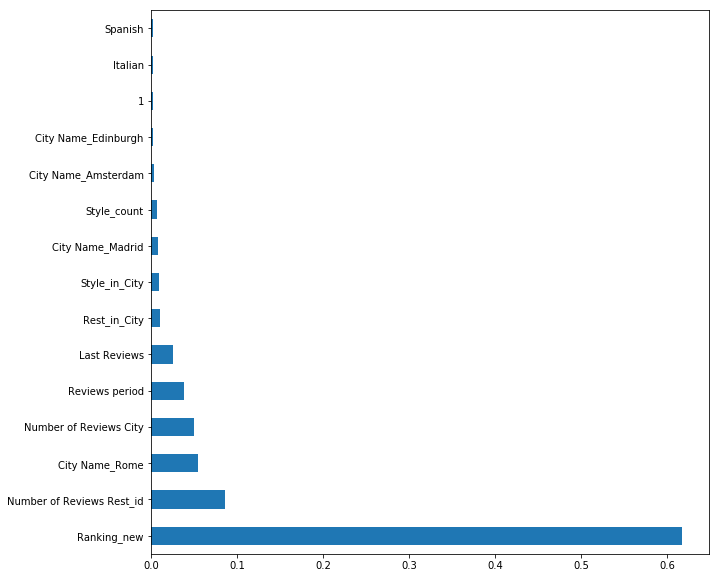

In [90]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [91]:
test_data.sample(10)

,Rating,Style_count,Rest_in_City,Style_in_City,Number of Reviews City,Number of Reviews Rest_id,Reviews period,Last Reviews,Price Range New,City Name_Amsterdam,...,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,Ranking_new
1948,0.0,5,1606,1606,13.0,13.0,-1.0,-1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0.79535
6323,0.0,1,2081,2081,181.0,15.0,-1.0,-1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0.67802
3056,0.0,1,2081,2081,2.0,2.0,-1.0,-1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0.67257
2296,0.0,1,4069,4069,8.0,8.0,0.0,2937.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0.91204
9032,0.0,2,314,314,5.0,5.0,153.0,1828.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0.71328
2983,0.0,1,4069,4069,169.0,95.0,0.0,1088.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0.90374
6720,0.0,1,4069,4069,34.0,34.0,0.0,1274.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0.36516
2134,0.0,1,4069,4069,2.0,2.0,-1.0,-1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0.59594
7792,0.0,2,2081,2081,7.0,7.0,-1.0,-1.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0.59764
3853,0.0,2,2081,2081,55.0,55.0,0.0,1897.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0.68619


In [92]:
test_data = test_data.drop(['Rating'], axis=1)

In [93]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [94]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [95]:
predict_submission

array([3.08 , 4.165, 4.475, ..., 3.085, 4.49 , 4.315])

In [96]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.080
1,id_1,4.165
2,id_2,4.475
3,id_3,4.370
4,id_4,4.475
5,id_5,4.420
6,id_6,2.535
7,id_7,2.725
8,id_8,4.250
9,id_9,4.660


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
